In [2]:
#import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#upload data to pandas

df = pd.read_csv("/chatgpt_reviews.csv")

https://drive.google.com/file/d/1SJcoCmSKSv2lRfdyKpiypk1cUBaLBD6C/view?usp=sharing

In [5]:
#getting preview of data

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


,Ratings
count,196727.000000
mean,4.503535
std,1.083004
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
#Standardizing Column Names

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
#Handling Missing Values

df['review'] = df['review'].fillna("No Review")
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [8]:
#Fixing Date & Time Format
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

In [9]:
#Then extracted: date, time, year, month
df['date'] = df['review_date'].dt.date
df['time'] = df['review_date'].dt.time
df['year'] = df['review_date'].dt.year
df['month'] = df['review_date'].dt.month
df['weekday'] = df['review_date'].dt.day_name()
df['hour'] = df['review_date'].dt.hour

In [10]:
#Categorizing Negative Reviews Into Issue Groups

'''
Category 1: Wrong or hallucinated answers
Keywords → “incorrect”, “wrong”, “fake”, “made up”, “not true”

Category 2: Too generic or unclear
Keywords → “generic”, “not detailed”, “confusing”

Category 3: Slow responses
Keywords → “slow”, “lag”, “delay”

Category 4: Outdated or bad training data
Keywords → “old info”, “not updated”

Category 5: Cannot browse internet
Keywords → “no internet”, “can’t access web”
'''

def issue_category(text):
    text = text.lower()
    if any(word in text for word in ["wrong","incorrect","inaccurate","hallucination"]):
        return "Incorrect Answers"
    elif any(word in text for word in ["generic","not detailed","vague"]):
        return "Lack of Depth"
    elif any(word in text for word in ["slow","lag","delay"]):
        return "Performance Issues"
    elif any(word in text for word in ["old","outdated","not updated"]):
        return "Outdated Information"
    elif any(word in text for word in ["internet","browse","web"]):
        return "No Internet Access"
    else:
        return "Other"

df['issue_type'] = df['review'].apply(issue_category)

In [11]:
#Polarity
#Sentiment label
#Subjectivity

from textblob import TextBlob

df["polarity"] = df["review"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["subjectivity"] = df["review"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

df["sentiment"] = df["polarity"].apply(
    lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral")
)

In [12]:
print(df.isnull().sum())

review_id       0
review          0
ratings         0
review_date     0
date            0
time            0
year            0
month           0
weekday         0
hour            0
issue_type      0
polarity        0
subjectivity    0
sentiment       0
dtype: int64


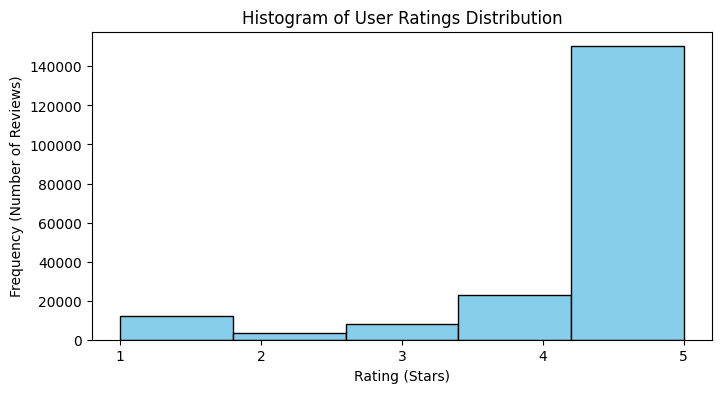

In [13]:
#Histogram of User Ratings Distribution

plt.figure(figsize=(8, 6))

df['ratings'].plot(kind='hist', bins=5, figsize=(8,4), edgecolor='black',color='skyblue', align='mid')

plt.title('Histogram of User Ratings Distribution')
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency (Number of Reviews)')

plt.xticks(range(1, 6))
plt.show()

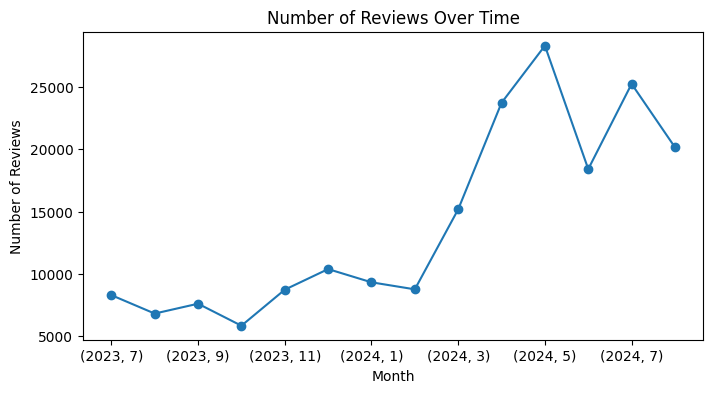

In [14]:
#Number of Reviews Over Time (Monthly Trend)

df.groupby(['year','month'])['review_id'].count().plot(
    kind='line', figsize=(8,4),color='tab:blue', marker='o', linestyle='-')

plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

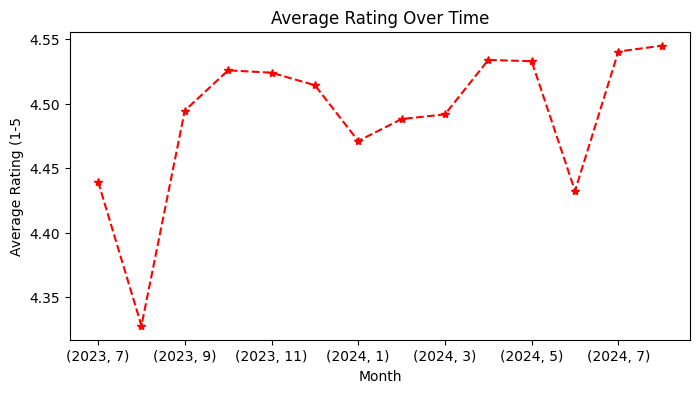

In [15]:
#Average Rating Over Time (Monthly Ratings Trend)

df.groupby(['year','month'])['ratings'].mean().plot(
    kind='line', figsize=(8,4),color='red', marker='*', linestyle='--')

plt.title('Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating (1-5')
plt.show()

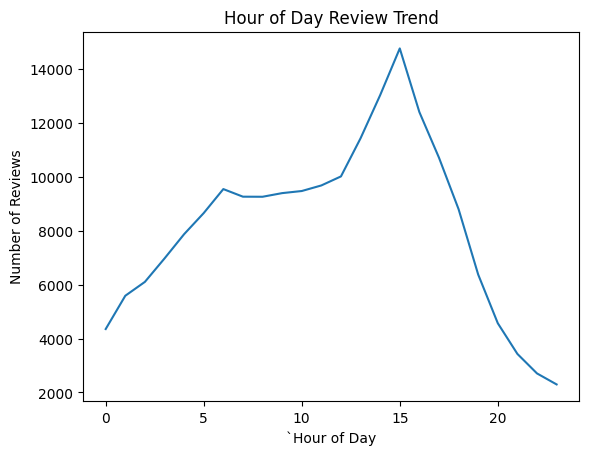

In [34]:
#Hour of Day Review Trend (User activity pattern)

df.groupby('hour')['review_id'].count().plot(kind='line')
plt.title('Hour of Day Review Trend')
plt.xlabel('`Hour of Day')
plt.ylabel('Number of Reviews')
plt.show()

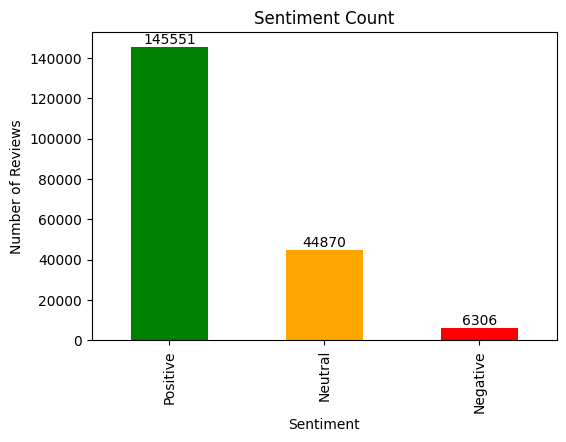

In [16]:
#Shows overall user satisfaction - Sentiment Category Count.

color = ['green','orange','red']
ax = df['sentiment'].value_counts().plot(kind='bar', figsize=(6,4), title='Sentiment Count',color =color )
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

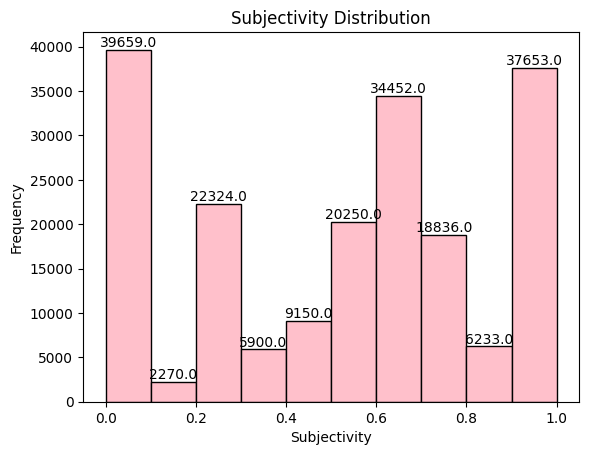

In [26]:
#Subjectivity Distribution

#"Shows how emotional or factual reviews are."

ax2 = df['subjectivity'].plot(kind='hist',edgecolor='black',color='pink', align='mid')
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")

for p in ax2.patches:
    ax2.annotate(
        f'{p.get_height():.1f}', # <<< CRITICAL CORRECTION HERE
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )
plt.show()

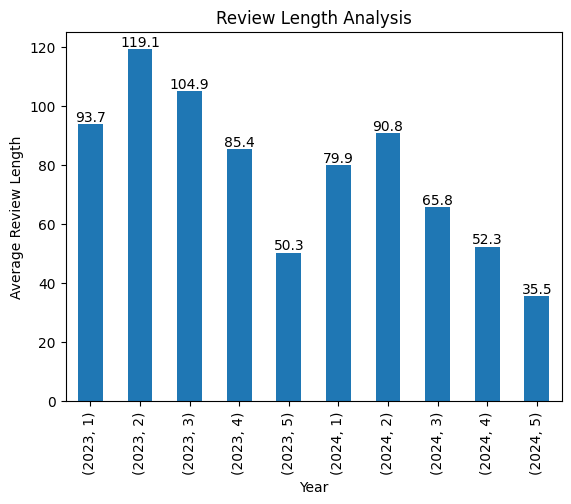

In [33]:
'''
Review Length Analysis (How detailed reviews are)
What it shows:
  1. Are reviews becoming longer over time?
  2. Are negative reviews longer? (Often they are.)
'''
df['review_length'] = df['review'].str.len()

ax2 = df.groupby(['year','ratings'])['review_length'].mean().plot(kind='bar')

plt.title("Review Length Analysis")
plt.xlabel("Year")
plt.ylabel("Average Review Length")

for p in ax2.patches:
    ax2.annotate(
        f'{p.get_height():.1f}', # <<< CRITICAL CORRECTION HERE
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )
# plt.show() # Remember to call show/save only once

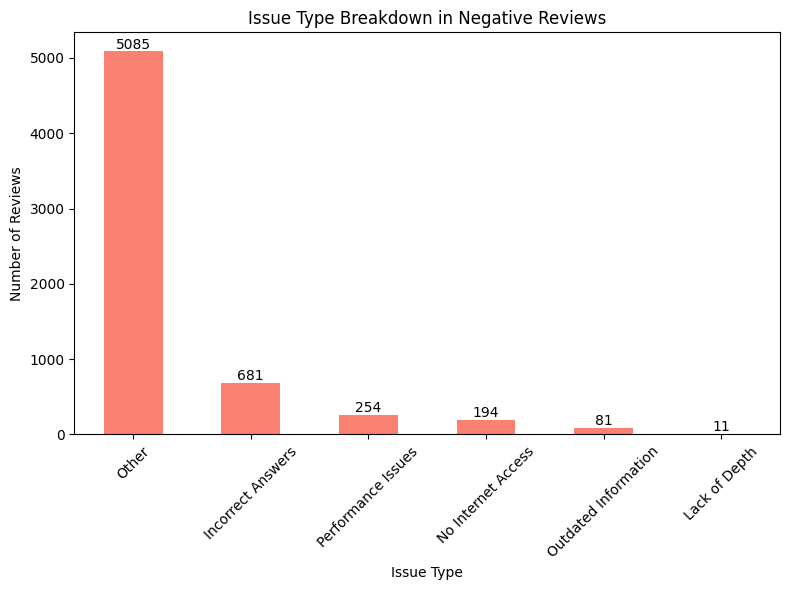

In [18]:
#count how many reviews fall into each problem:
#Like: Incorrect Answers / Outdated Info / Slow / Generic

fig, ax1 = plt.subplots(figsize=(8, 6))

df[df['sentiment']=="Negative"]['issue_type'].value_counts().plot(kind='bar', ax=ax1, color='salmon')

ax1.set_title('Issue Type Breakdown in Negative Reviews')
ax1.set_xlabel('Issue Type')
ax1.set_ylabel('Number of Reviews')

ax1.tick_params(axis='x', rotation=45)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
# plt.show()

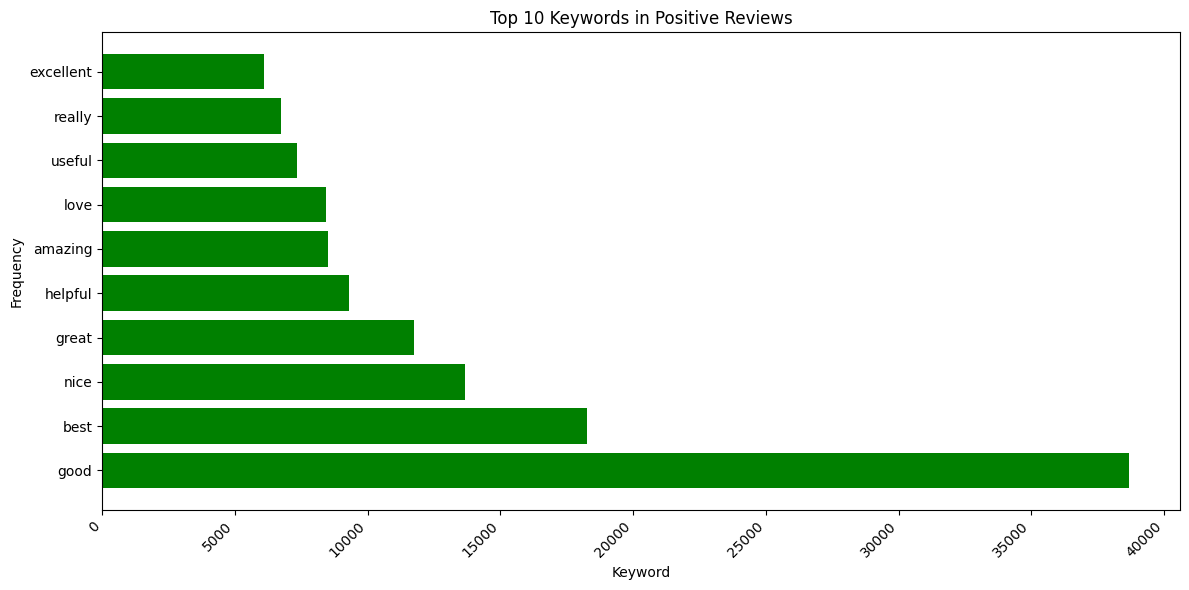

In [25]:
from collections import Counter
import re

# Define Stop Words (Expanded list to exclude common, uninformative words)
stopwords = ["the","is","and","a","to","of","in","it","i","for","this","that","on","with","was","my","but","so","it's","you","not","have","be","just","are","as","an","at","by","from","has","he","we","she","all","its","can","do","like","what","if","your","would","when","get","me","will","use","app","very","one","chatgpt","bot"]

# --- POSITIVE KEYWORD EXTRACTION ---

# remove punctuation and convert to lowercase
df['clean_text'] = df['review'].astype(str).str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

# Filter only positive reviews
positive_df = df[df['sentiment'] == "Positive"]

# Combine all positive review text into a single string
text = " ".join(positive_df['clean_text'].astype(str))

# Extract and filter words
words = text.split()

# Filter out stop words and short words (length 2 or less)
filtered_words = [w for w in words if w not in stopwords and len(w) > 2]
word_freq = Counter(filtered_words).most_common(10)


plt.figure(figsize=(12,6))
words_list = [w[0] for w in word_freq]
freq_list = [w[1] for w in word_freq]

# Generate the bar plot
plt.barh(words_list, freq_list, color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Keywords in Positive Reviews")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Heatmap — Ratings by Month & Year')

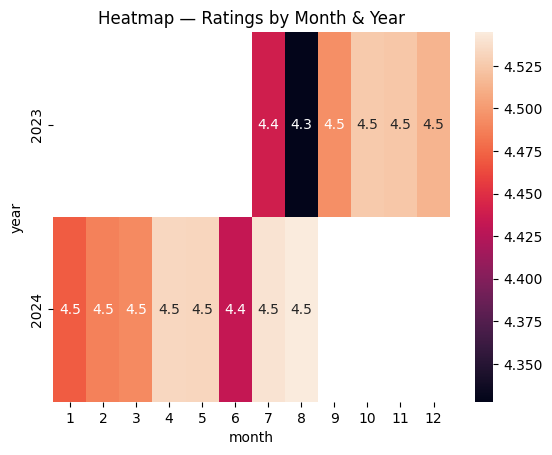

In [21]:
#A visual grid of satisfaction over time.

pivot = df.pivot_table(values='ratings', index='year', columns='month', aggfunc='mean')
sns.heatmap(pivot, annot=True)
plt.title('Heatmap — Ratings by Month & Year')

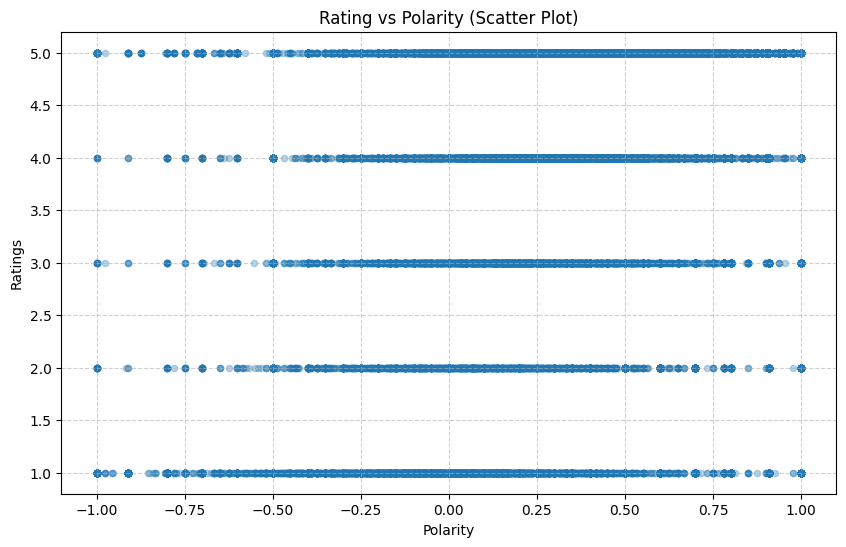

In [23]:
'''
This plot visualizes the relationship between the sentiment polarity of reviews
(how positive or negative the text is) and the star ratings given by users.
'''
plt.figure(figsize=(10, 6))
df.plot(kind='scatter', x='polarity', y='ratings', ax=plt.gca(), alpha=0.3)
plt.title('Rating vs Polarity (Scatter Plot)')
plt.xlabel('Polarity')
plt.ylabel('Ratings')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()